*TshepoMK*

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get Data

In [3]:
df = pd.read_csv('KNN Test.csv')

In [4]:
df.head()

,No,EG_Home,EG_Away,STDV_Home,STDV_Away,Min_Home,Min_Away,Max_Home,Max_Away,League,Pos_Home,Pos_Away,Win_Home,Draw_Home,Lose_Home,Win_Away,Draw_Away,Lose_Away,Outcome
0,1,0.657143,1.828571,0.790763,1.372024,0,0,3,6,1,15,2,0,1,0,1,0,0,Home
1,2,1.318182,1.136364,1.257211,1.217130,0,0,4,5,1,11,8,0,0,1,0,1,0,Away
2,3,1.866667,1.066667,1.359739,1.236482,0,0,5,5,9,3,5,1,0,0,0,0,1,Home
3,4,1.291667,1.708333,1.039999,1.499421,0,0,4,7,10,8,1,0,1,0,0,0,0,Home
4,5,1.533333,1.600000,1.087300,0.879394,0,0,4,3,2,9,8,0,1,0,1,0,0,Home


I have collected this data on the internet and engineered the two features, the EG_Home and EG_Away columns, I used statistical anaylysis to calculate the Expected Goal (EG) for each team, use features that best describe or directly affect your outcome

# Standardise Data

To avoid great variation in the data, I will standardise it, much like calculating a percentage to compare all the results to 100, python will do something similarly

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('Outcome',axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

I want to standardise all the features excluding the Outcome column (results), hence I am dropping the outcome column


In [8]:
scaled_features = scaler.transform(df.drop('Outcome',axis = 1))

In [10]:
scaled_features

array([[ -1.70084013e+00,  -1.14229193e+00,   5.67358387e-01,
         -4.24685789e-01,   8.31522853e-01,  -3.58057437e-01,
         -3.73108589e-01,  -9.16305722e-02,   1.43836069e+00,
         -8.11721417e-01,   9.46704328e-01,  -1.00148179e+00,
         -9.12870929e-01,   1.56124950e+00,  -5.84348710e-01,
          1.32287566e+00,  -4.42325868e-01,  -8.79882690e-01],
       [ -1.63784605e+00,   1.24721749e-01,  -4.46469787e-01,
          7.02923244e-01,   4.91033768e-01,  -3.58057437e-01,
         -3.73108589e-01,   6.28323923e-01,   8.15448581e-01,
         -8.11721417e-01,   2.72675357e-01,   2.04682409e-01,
         -9.12870929e-01,  -6.40512615e-01,   1.71130694e+00,
         -7.55928946e-01,   2.26077666e+00,  -8.79882690e-01],
       [ -1.57485197e+00,   1.17600311e+00,  -5.48550048e-01,
          9.50778346e-01,   5.33574962e-01,  -3.58057437e-01,
         -3.73108589e-01,   1.34827842e+00,   8.15448581e-01,
          1.97857095e+00,  -1.07538259e+00,  -3.98399690e-01,
      

In [11]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [18]:
df_new = df_feat.drop('No', axis = 1)

In [19]:
df_new.head()

,EG_Home,EG_Away,STDV_Home,STDV_Away,Min_Home,Min_Away,Max_Home,Max_Away,League,Pos_Home,Pos_Away,Win_Home,Draw_Home,Lose_Home,Win_Away,Draw_Away,Lose_Away
0,-1.142292,0.567358,-0.424686,0.831523,-0.358057,-0.373109,-0.091631,1.438361,-0.811721,0.946704,-1.001482,-0.912871,1.561249,-0.584349,1.322876,-0.442326,-0.879883
1,0.124722,-0.446470,0.702923,0.491034,-0.358057,-0.373109,0.628324,0.815449,-0.811721,0.272675,0.204682,-0.912871,-0.640513,1.711307,-0.755929,2.260777,-0.879883
2,1.176003,-0.548550,0.950778,0.533575,-0.358057,-0.373109,1.348278,0.815449,1.978571,-1.075383,-0.398400,1.095445,-0.640513,-0.584349,-0.755929,-0.442326,1.136515
3,0.073900,0.391254,0.177826,1.111569,-0.358057,-0.373109,0.628324,2.061273,2.327358,-0.232846,-1.202509,-0.912871,1.561249,-0.584349,-0.755929,-0.442326,-0.879883
4,0.537103,0.232586,0.292176,-0.251381,-0.358057,-0.373109,0.628324,-0.430376,-0.462935,-0.064339,0.204682,-0.912871,1.561249,-0.584349,1.322876,-0.442326,-0.879883


# Test Train and Split

In [22]:
from sklearn.cross_validation import train_test_split

C:\Users\tshepom\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
X = df_new
y = df['Outcome']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Fit and Predict

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors= 1)

Since we are using the knn model, I will start with k = 1 (n_neighbor = 1, one neighbor)

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [31]:
pred = knn.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

The classification report and the confusion matrix will allow me to see the accuracy and hits and misses

In [30]:
print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))

[[4 3 0]
 [2 0 2]
 [3 1 2]]
             precision    recall  f1-score   support

       Away       0.44      0.57      0.50         7
       Draw       0.00      0.00      0.00         4
       Home       0.50      0.33      0.40         6

avg / total       0.36      0.35      0.35        17



Note that precision at k = 1, for away wins is 44%, 0 for Draws and 50% for Home wins. The reason for the 0 for draws might be because of the fact that my data set has 27 away wins, 27 home wins and 12 Draws, and at k = 1, there are no draws (neighbors) or the model simply sucks, but there must be a way to make k or n_neighbors a variable that can be tested to see which value for k this data set will give best results. And one the following cell, I explore that.

In [34]:
error_rate = []

for i in range(1, 38):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


I first create an empty list to store all my errors, and then I loop through all the k values to 37 and storing the errors, now I will plot the results to determine the lowest error rate and use that k value. 

Text(0,0.5,'Error Rate')

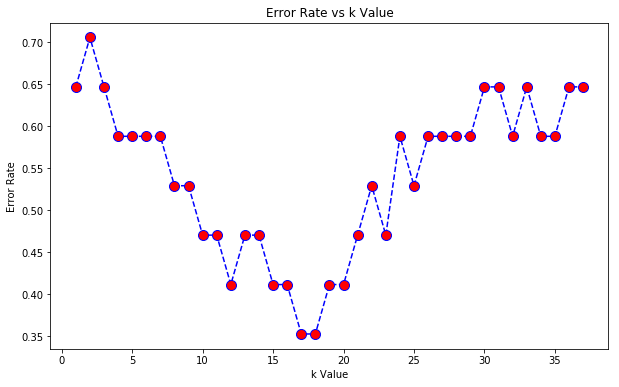

In [36]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 38), error_rate,color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor= 'red', markersize = 10)
plt.title('Error Rate vs k Value')
plt.xlabel('k Value')
plt.ylabel('Error Rate')

From the above plot 17 and 18 k values have the lowest error rate at 35%, so I will use either of the value in my prediction.

In [40]:
knn2 = KNeighborsClassifier(n_neighbors= 17)
knn2.fit(X_train, y_train)
pred = knn2.predict(X_test)
print (confusion_matrix(y_test, pred))
print ('\n')
print (classification_report(y_test, pred))

[[5 1 1]
 [1 0 3]
 [0 0 6]]


             precision    recall  f1-score   support

       Away       0.83      0.71      0.77         7
       Draw       0.00      0.00      0.00         4
       Home       0.60      1.00      0.75         6

avg / total       0.55      0.65      0.58        17



* k = 1             
* Away = 44        
* Draw = 0         
* Home = 50        
* 
* 
* k = 17 
* Away = 83
* Draw = 0
* Home = 60

I guess my model needs more data for draws in the test data before I can dismiss it, but one amazing thing to note for k = 17 is that it produced a 100% recall for home games, and Away precision prediction doubled. 